# 프로젝트: OCR 모델 비교
* OCR 구현방법: google-api, Keras-ocr, 테서랙트

## 개념 정리 
### 1. OCR: Localization과 Recognition 
### 2. Object Detection: Localization과 Recognition

## Localization
### 자유도 기준
* RECT(자유도 4)
* RBOX(자유도 5)
* QUAD(자유도 8)
* POLY 

### 구현 방법 
* Regression-based(object detection) >> "unstable"
* Classification-based(semantic segmentation) >> "stable"
* end-to-end

## Recognition 
### 구현 방법 
* Text spotting 
* CTC-basedd
* Attention-based

### 딥러닝 기반 객체 검출 방법 
#### Regression(회귀)
#### Segmentation



1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?
    - 목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.
2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?
    - 평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.
3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?
    - 최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.

In [1]:
## 설치 필요한 라이브러리/패키지
# !pip install --upgrade google-api-python-client
# !pip install google-cloud-vision
# !pip install keras-ocr

In [24]:
import os
import cv2 # images load 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

## Step1. 검증용 데이터셋 준비

In [7]:
img_path = os.getenv('HOME') + '/aiffel/ocr_python/image/'

In [8]:
# file list 확인
file_list = os.listdir(img_path)

for file in file_list:
    print(file)

vertical_en.jpg
neon_kor.jpg
vertical_kor.jpg
horizon_kor.png
horizon_en.jpg
horizon_ch.jpg
horizon_jp.jpg
neon_en.jpg


In [38]:
images = []

for file in file_list:
    img = cv2.imread(img_path + str(file))
    if img is not None:
        images.append(img)

In [39]:
lst = [1,2,3]
lst.index(1)

0

In [40]:
type(images), len(images), images.index(img)

(list, 8, 7)

In [41]:
file_list[images.index(img)]

'neon_en.jpg'

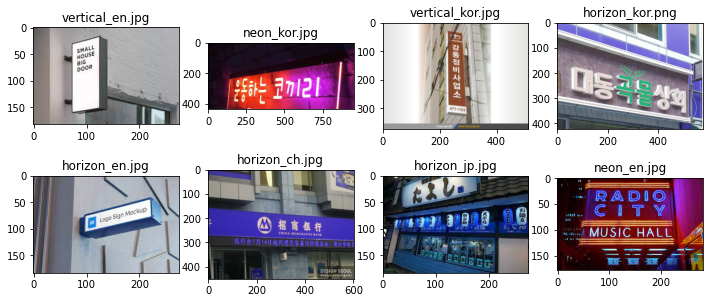

In [33]:
fig = plt.figure(figsize = (12, 5))
grid_row = 2

for file in file_list: # images에서 image 하나씩 가져오기
    idx = file_list.index(file)
    img = cv2.imread(img_path + '/' + file)
    ax = fig.add_subplot(grid_row,len(images)/grid_row, idx+1)
    imgplot = plt.imshow(img)
    ax.set_title(file_list[idx])

## Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행

### 1. Google OCR API 사용

In [45]:
# API 사용 
from google.cloud import vision
import io
    
def detect_text(path):
    """Detects text in the file."""
    file
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [3]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

-rw-rw-r-- 1 aiffel-dj19 aiffel-dj19 2343  3월 23 10:59 /home/aiffel-dj19/aiffel/ocr_python/my_google_api_key.json


In [5]:
# # keras-ocr, pretrained-model의 사용 tf 버전 = 2.2.0 
# !pip uninstall tensorflow-gpu -y
# !pip uninstall tensorflow -y 
# !pip install tensorflow-gpu==2.2.0 -y  

In [ ]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

In [47]:
for file in file_list:
    print(file)
    print()
    detect_text(img_path + '/' + file)
    print('=======================================')

vertical_en.jpg

Texts:

"SMALL
HOUSE
BIG
DOOR
"

"SMALL"

"HOUSE"

"BIG"

"DOOR"
bounds: (82,76),(109,70),(111,78),(84,84)
neon_kor.jpg

Texts:

"운동하는 코끼리
"

"운동"

"하는"

"코끼리"
bounds: (417,234),(675,222),(681,362),(424,374)
vertical_kor.jpg

Texts:

"477-1123
Copyright©
www.hanasign.kr
의 강동정비사업소
"

"477-1123"

"Copyright©"

"www.hanasign.kr"

"의"

"강동"

"정비"

"사업소"
bounds: (238,180),(273,179),(275,261),(240,262)
horizon_kor.png

Texts:

"마동곡물생회
"

"마동"

"곡물"

"생회"
bounds: (391,243),(525,269),(507,362),(373,336)
horizon_en.jpg

Texts:

"M Logo Sign Mockup
"

"M"

"Logo"

"Sign"

"Mockup"
bounds: (173,68),(213,58),(215,68),(175,78)
horizon_ch.jpg

Texts:

"XDBS
M招商銀行
务
CHINA MERCHANTS BANK
我行自7月14日起代理发售嘉实回報基金、博时策略。
DESIGN SEOUL
design.seoul.go.kr
五曜之流
"

"XDBS"

"M"

"招商"

"銀行"

"务"

"CHINA"

"MERCHANTS"

"BANK"

"我"

"行"

"自"

"7"

"月"

"14"

"日"

"起"

"代理"

"发售"

"嘉实"

"回報"

"基金"

"、"

"博"

"时"

"策略"

"。"

"DESIGN"

"SEOUL"

"design.seoul.go.kr"

"五"

"曜"

"之流"
bounds: (208,443),(222,

UnboundLocalError: local variable 'text' referenced before assignment

* Error Report 
UnboundLocalError: local variable 'text' referenced before assignment
    
위와 같은 엘 

## Step3. 테스트 결과 정리

## Step4. 결과 분석과 결론 제시

## 구현 서비스
여행지 식당명 안내기 

## 구현 목적 
외국 여행 중에 밥을 먹으러 갈 때 식당 이름을 알려주기 위한 서비스 

## 서비스 내용 
식당 간판을 사진에 담으면 식당명을 OCR 모델을 통해 추출하고, 이를 구글 검색이나, 지도 검색에서 활용할 수 있도록 한다. 

## 평가기준 
여러 언어를 입력 셋으로 뒀을 때 해당 모델이 잘 동작하는지 확인한다. 그리고, 세로 간판, 가로 간판일 경우와 이외에도 네온사인 간판에 있어서도 잘 동작하는지 확인한다. 
* 언어: 영어, 한국어, 일본어, 중국어 
* 간판 종류: 세로 간판, 가로 간판, 네온사인 간판 

단어에 대한 복원률을 실제 간판 이름의 글자별 개수 중 동일한 문자 개수의 비중을 구하여 판단한다. 
* 복원률: OCR 모델 결과물과 실제 간판간의 동일한 문자 개수/ 실제 간판의 문자 개수 